<a href="https://colab.research.google.com/github/Vijaya-lakshmi4/Major-Project/blob/main/Project_2_Spotify_Songs%E2%80%99_Genre_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
spotify_data=pd.read_csv("/content/spotify dataset.csv")
spotify_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6.0,-2.634,1.0,0.0583,0.102000,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11.0,-4.969,1.0,0.0373,0.072400,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-3.432,0.0,0.0742,0.079400,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7.0,-3.778,1.0,0.1020,0.028700,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-4.672,1.0,0.0359,0.080300,0.000000,0.0833,0.725,123.976,189052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21881,3B7i9OKRRmIsSBHEbJz58Y,Grind with Me,Pretty Ricky,66,5Kexjw3aLUrvDNAGrUMAmE,Bluestars,2005-05-17,The Sound of Urban Contemporary,07zF8MjQPsiYUXiAIGZ5TA,r&b,...,1.0,-5.952,1.0,0.0450,0.000204,0.000000,0.1050,0.189,136.518,237733.0
21882,3r0Rhl5Zdo9YjACZNsaBvN,Nite and Day,Al B. Sure!,51,3RjOQ5eRm9f5kf6ysRpByu,In Effect Mode,1988-04-26,The Sound of Urban Contemporary,07zF8MjQPsiYUXiAIGZ5TA,r&b,...,1.0,-9.616,0.0,0.0421,0.029000,0.000221,0.0518,0.642,92.097,238013.0
21883,0v9kGNjkKdQUdDoBIuiph4,My Prerogative,Bobby Brown,56,44w4sVYJVQzhH2dN3IwyIK,Don't Be Cruel,1988-01-01,The Sound of Urban Contemporary,07zF8MjQPsiYUXiAIGZ5TA,r&b,...,9.0,-10.544,1.0,0.0524,0.065700,0.000000,0.2700,0.676,110.172,291560.0
21884,6uQKuonTU8VKBz5SHZuQXD,This Is How We Do It,Montell Jordan,65,4GZFWGyRE8SfRw8wEu3WoL,This Is How We Do It,1995-01-01,The Sound of Urban Contemporary,07zF8MjQPsiYUXiAIGZ5TA,r&b,...,0.0,-9.374,1.0,0.0812,0.014100,0.000000,0.4300,0.773,103.649,238800.0


# **Data pre-processing operations**

In [7]:
spotify_data.info()
# information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21886 entries, 0 to 21885
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  21886 non-null  object 
 1   track_name                21881 non-null  object 
 2   track_artist              21881 non-null  object 
 3   track_popularity          21886 non-null  int64  
 4   track_album_id            21886 non-null  object 
 5   track_album_name          21881 non-null  object 
 6   track_album_release_date  21886 non-null  object 
 7   playlist_name             21886 non-null  object 
 8   playlist_id               21885 non-null  object 
 9   playlist_genre            21885 non-null  object 
 10  playlist_subgenre         21885 non-null  object 
 11  danceability              21885 non-null  float64
 12  energy                    21885 non-null  float64
 13  key                       21885 non-null  float64
 14  loudne

In [8]:
# Handling missing values
spotify_data_cleaned = spotify_data.dropna()
spotify_data_cleaned

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6.0,-2.634,1.0,0.0583,0.102000,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11.0,-4.969,1.0,0.0373,0.072400,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-3.432,0.0,0.0742,0.079400,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7.0,-3.778,1.0,0.1020,0.028700,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-4.672,1.0,0.0359,0.080300,0.000000,0.0833,0.725,123.976,189052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21880,1jCsCYgzQQHk3bDJDuFbNi,If I Ever Fall In Love,Shai,56,1BSzAkEW5ZE2QsBScQgoAb,If I Ever Fall In Love,1992-01-01,The Sound of Urban Contemporary,07zF8MjQPsiYUXiAIGZ5TA,r&b,...,6.0,-11.232,1.0,0.0380,0.758000,0.000000,0.1470,0.420,143.994,189027.0
21881,3B7i9OKRRmIsSBHEbJz58Y,Grind with Me,Pretty Ricky,66,5Kexjw3aLUrvDNAGrUMAmE,Bluestars,2005-05-17,The Sound of Urban Contemporary,07zF8MjQPsiYUXiAIGZ5TA,r&b,...,1.0,-5.952,1.0,0.0450,0.000204,0.000000,0.1050,0.189,136.518,237733.0
21882,3r0Rhl5Zdo9YjACZNsaBvN,Nite and Day,Al B. Sure!,51,3RjOQ5eRm9f5kf6ysRpByu,In Effect Mode,1988-04-26,The Sound of Urban Contemporary,07zF8MjQPsiYUXiAIGZ5TA,r&b,...,1.0,-9.616,0.0,0.0421,0.029000,0.000221,0.0518,0.642,92.097,238013.0
21883,0v9kGNjkKdQUdDoBIuiph4,My Prerogative,Bobby Brown,56,44w4sVYJVQzhH2dN3IwyIK,Don't Be Cruel,1988-01-01,The Sound of Urban Contemporary,07zF8MjQPsiYUXiAIGZ5TA,r&b,...,9.0,-10.544,1.0,0.0524,0.065700,0.000000,0.2700,0.676,110.172,291560.0


In [9]:
spotify_data_cleaned['track_album_release_date'] = pd.to_datetime(spotify_data_cleaned['track_album_release_date'],errors='coerce')


<ipython-input-9-ad201801dade>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['track_album_release_date'] = pd.to_datetime(spotify_data_cleaned['track_album_release_date'],errors='coerce')


# **Exploratory Data Analysis (EDA) and Visualization**

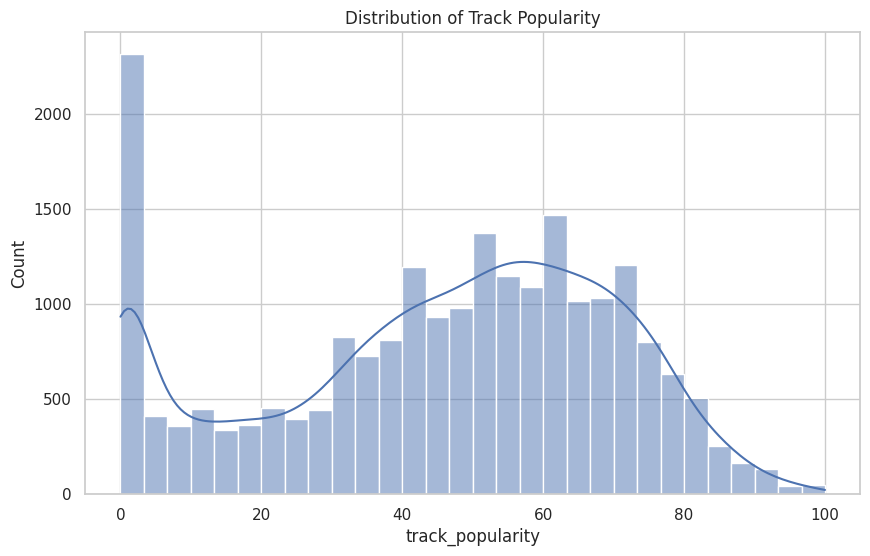

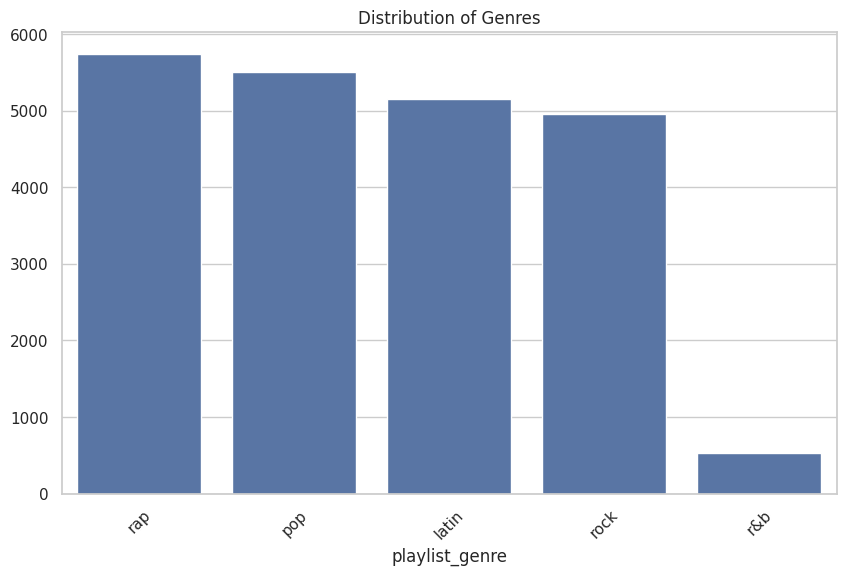

In [10]:

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of Track Popularity
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data_cleaned['track_popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.show()

# Genre Distribution
plt.figure(figsize=(10, 6))
genre_counts = spotify_data_cleaned['playlist_genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Genres')
plt.xticks(rotation=45)
plt.show()

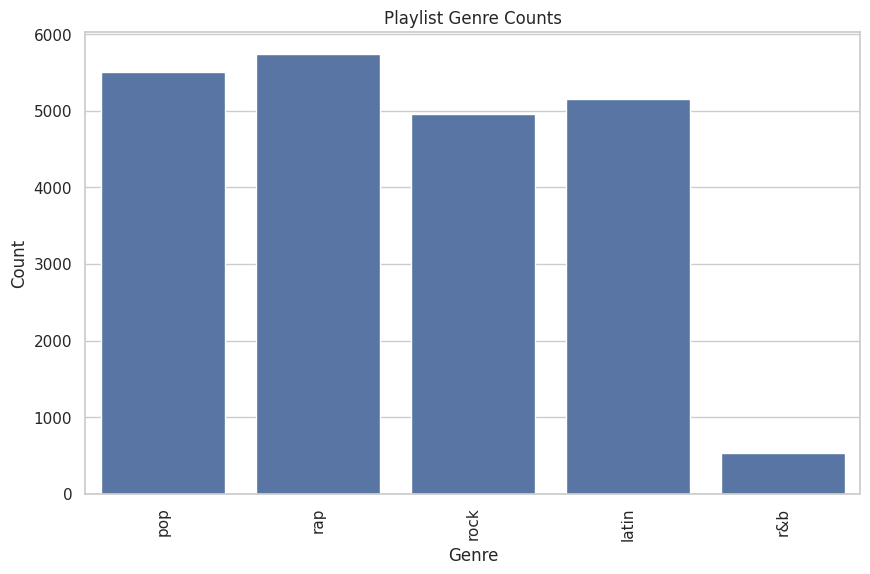

In [14]:
#Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=spotify_data_cleaned, x='playlist_genre')
plt.title('Playlist Genre Counts')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

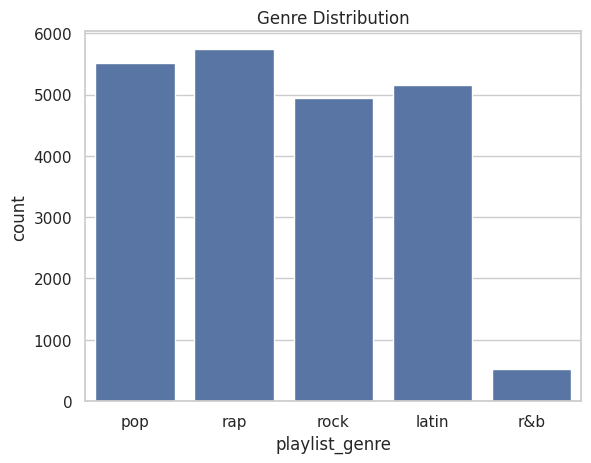

In [15]:
sns.countplot(x='playlist_genre', data=spotify_data_cleaned)
plt.title('Genre Distribution')
plt.show()

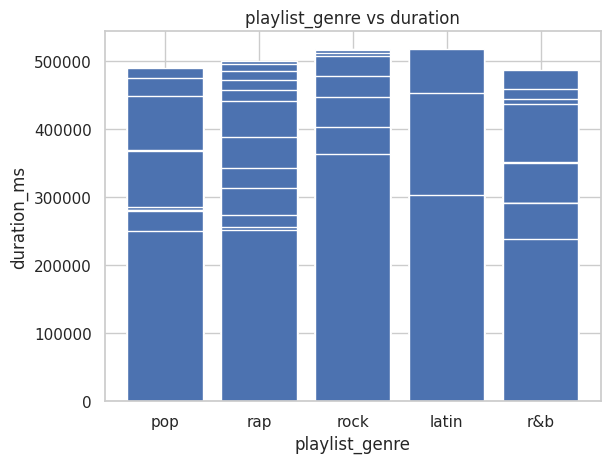

In [16]:
x=spotify_data_cleaned["playlist_genre"]
y=spotify_data_cleaned["duration_ms"]
plt.bar(x, y)
plt.xlabel("playlist_genre")
plt.ylabel("duration_ms")
plt.title("playlist_genre vs duration")
plt.show()

<Axes: >

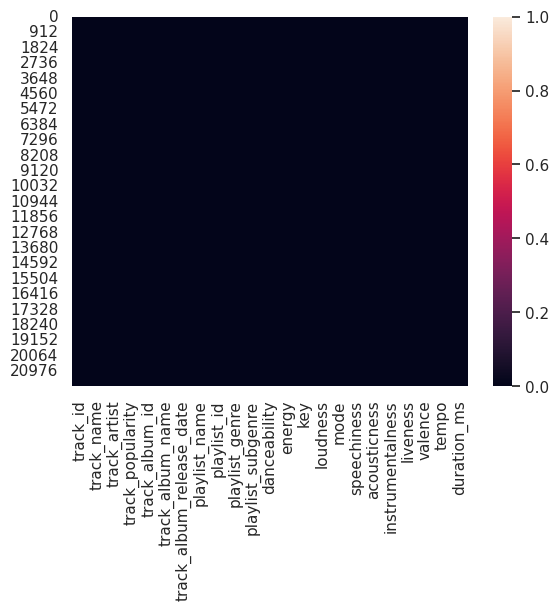

In [17]:
sns.heatmap(spotify_data.isnull())

# **correlation matrix**

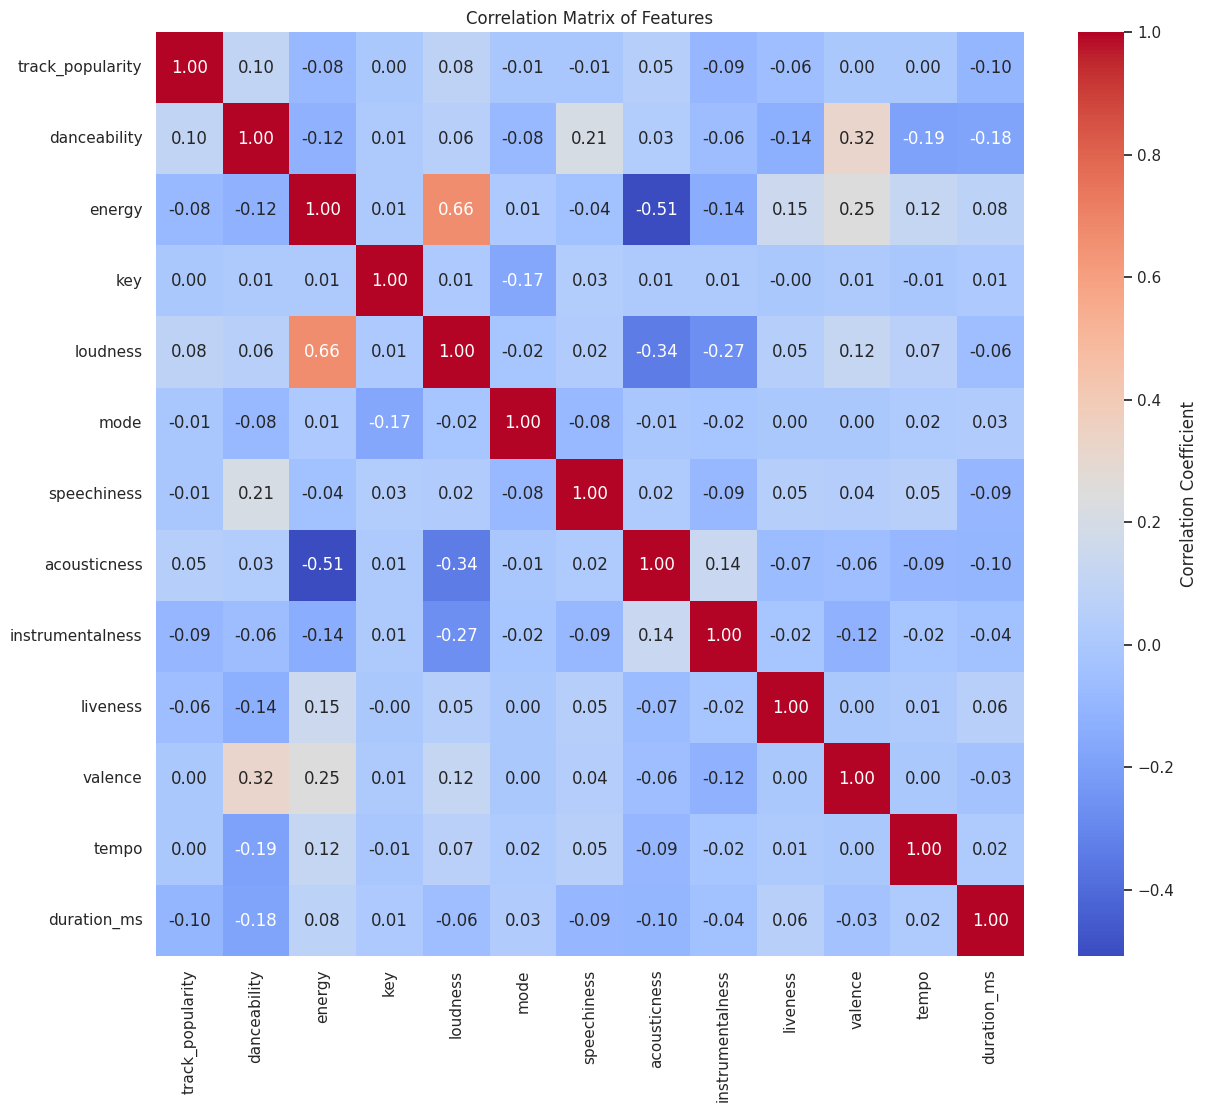

In [ ]:
# Calculate and plot the correlation matrix
corr_matrix = spotify_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Features')
plt.show()

# **Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-f523625271fb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['cluster'] = kmeans.labels_


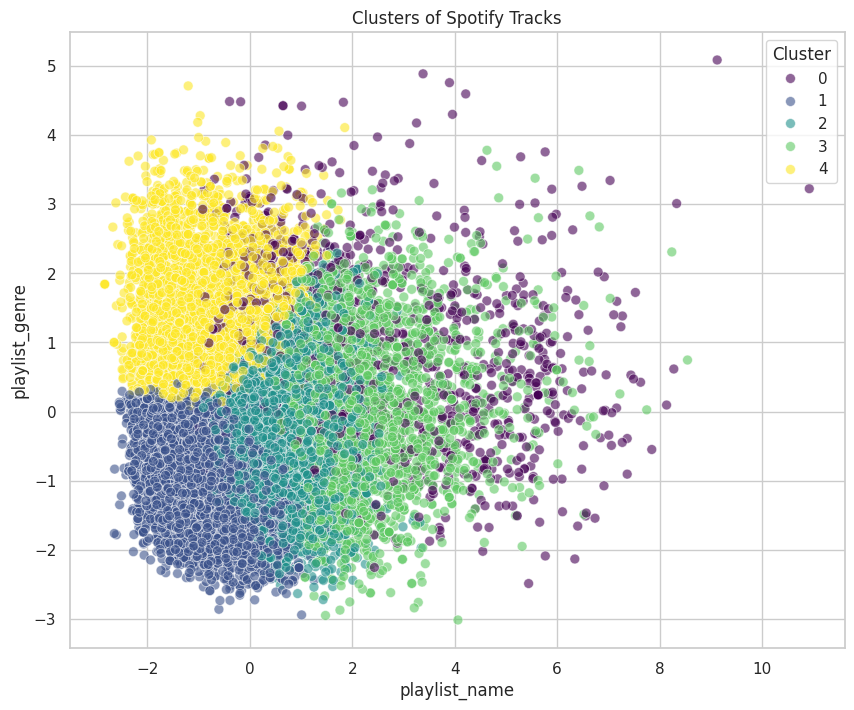

In [ ]:

# Clustering

# Feature selection for clustering
features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
X = spotify_data_cleaned[features]

# Standardization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Number of clusters is chosen arbitrarily
kmeans.fit(X_scaled)

# Assign cluster labels to the original data
spotify_data_cleaned['cluster'] = kmeans.labels_

# Dimensionality Reduction with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='cluster', data=spotify_data_cleaned, palette='viridis', s=50, alpha=0.6)
plt.title('Clusters of Spotify Tracks')
plt.xlabel('playlist_name')
plt.ylabel('playlist_genre')
plt.legend(title='Cluster')
plt.show()


# **Recommandation System**

In [ ]:

# Recommendation function
def recommend_songs(song_id, spotify_data, num_recommendations=5):
    """
    Recommends songs from the same cluster as the input song.

    Parameters:
    - song_id: The ID of the song for which recommendations are sought.
    - spotify_data: The DataFrame containing the Spotify dataset with cluster labels.
    - num_recommendations: The number of recommendations to return.

    Returns:
    - A DataFrame containing the recommended songs.
    """
    if song_id not in spotify_data['track_id'].values:
        print("Song ID not found in the dataset.")
        return None

    # Find the cluster of the input song
    song_cluster = spotify_data[spotify_data['track_id'] == song_id]['cluster'].values[0]

    # Filter songs from the same cluster
    recommended_songs = spotify_data[spotify_data['cluster'] == song_cluster]

    # Remove the input song from the recommendations
    recommended_songs = recommended_songs[recommended_songs['track_id'] != song_id]

    # Randomly select songs from the same cluster
    recommendations = recommended_songs.sample(n=num_recommendations)

    return recommendations[['track_id', 'track_name', 'track_artist', 'cluster']]

# Example usage
song_id_example = spotify_data_cleaned['track_id'].iloc[0]
recommendations = recommend_songs(song_id_example, spotify_data_cleaned, num_recommendations=5)
print(recommendations)

                     track_id                                     track_name  \
19608  6uIk27ADwVYHMSlOXtgEOv                                       Caliente   
21203  6UUzt6LPtVNwy8l6jqu9C9     You're The One That I Want - From “Grease”   
6844   3LPNfzKa0VYlNedCY4MuBy  Cot Damn (feat. Ab-Liva & Rosco P. Coldchain)   
19456  6JFsaLR3DbdbBSmr75DlpA                    Deja (feat. Nejo Y Dalmata)   
7000   6lah2pPQVdTsfoMSHkyYmn                           Never Leave Me Alone   

         track_artist  cluster  
19608  Dyland & Lenny        1  
21203   John Travolta        1  
6844           Clipse        1  
19456       J Alvarez        1  
7000        Nate Dogg        1  
